Construct a fully connected neural network model for classifying the CIFAR-10
dataset.

In [ ]:
from keras.datasets import cifar10 # Change CIFAR10 to cifar10
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
training images shapes:  (50000, 32, 32, 3)
testing images shapes:  (10000, 32, 32, 3)
training targets shapes:  (50000, 1)
testing targers shapes:  (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = class_names.__len__()
print(num_classes)

10


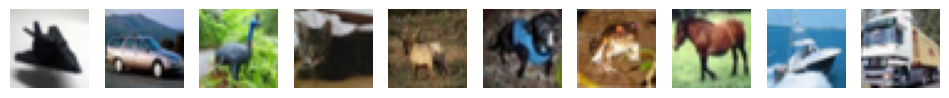

In [ ]:
#Visualize the data by plotting an image from each category from the CIFAR-10 dataset.
plt.figure(figsize=(12, 3))
for i in range(num_classes):
  plt.subplot(1, num_classes, i + 1)
  image = x_train[y_train.flatten() == i][0]
  plt.imshow(image)
  plt.axis("off")
plt.show()

Demonstrate the tuning of the hyperparameters of the neural network via grid-search.


In [ ]:
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=99)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import ParameterGrid
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

def grid_search(x_train, y_train, x_val, y_val):
    # Hyperparameters i am working with
    param_grid = {
        'hidden_size': [256, 512],
        'num_layers': [2, 3],
        'dropout_rate': [0.3, 0.5],
        'learning_rate': [0.001, 0.0001]
    }

    #just for output
    best_val_acc = 0
    best_params = None

    # Iteration
    for params in ParameterGrid(param_grid):

        model = create_model(
            hidden_size=params['hidden_size'],
            num_layers=params['num_layers'],
            dropout_rate=params['dropout_rate']
        )

        # Configure
        optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )


        history = model.fit(
            x_train, y_train,
            epochs=10, #messed around with this; i tried 100 first but would probably have gone on for days
            batch_size=6,
            validation_data=(x_val, y_val),
            verbose=0
        )

        val_acc = max(history.history['val_accuracy'])
        print(f"Params: {params}, Best Validation Accuracy: {val_acc:.4f}")

        # Update best parameters if current model is better
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_params = params


    print(f"Best parameters: {best_params}")
    return best_params

# Placeholder for model creation function (to be implemented)
def create_model(hidden_size, num_layers, dropout_rate):
    """Creates a fully connected neural network model."""
    model = keras.Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Input layer for CIFAR-10 images

    # Add hidden layers based on num_layers
    for _ in range(num_layers):
        model.add(Dense(hidden_size, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (CIFAR-10)
    return model


# Use case
if __name__ == "__main__":
    # Load and preprocess CIFAR-10 data
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_test = keras.utils.to_categorical(y_test, num_classes=10)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=99)

    # Run grid search
    best_params = grid_search(x_train, y_train, x_val, y_val)


Params: {'dropout_rate': 0.3, 'hidden_size': 256, 'learning_rate': 0.001, 'num_layers': 2}, Best Validation Accuracy: 0.1921
Params: {'dropout_rate': 0.3, 'hidden_size': 256, 'learning_rate': 0.001, 'num_layers': 3}, Best Validation Accuracy: 0.1987
Params: {'dropout_rate': 0.3, 'hidden_size': 256, 'learning_rate': 0.0001, 'num_layers': 2}, Best Validation Accuracy: 0.4411
Params: {'dropout_rate': 0.3, 'hidden_size': 256, 'learning_rate': 0.0001, 'num_layers': 3}, Best Validation Accuracy: 0.4233
Params: {'dropout_rate': 0.3, 'hidden_size': 512, 'learning_rate': 0.001, 'num_layers': 2}, Best Validation Accuracy: 0.1937
Params: {'dropout_rate': 0.3, 'hidden_size': 512, 'learning_rate': 0.001, 'num_layers': 3}, Best Validation Accuracy: 0.2397


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4165 - loss: 1.6334 - val_accuracy: 0.4251 - val_loss: 1.6061
Epoch 2/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4291 - loss: 1.5903 - val_accuracy: 0.4495 - val_loss: 1.5476
Epoch 3/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4485 - loss: 1.5530 - val_accuracy: 0.4401 - val_loss: 1.5692
Epoch 4/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4595 - loss: 1.5188 - val_accuracy: 0.4404 - val_loss: 1.5593
Epoch 5/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4592 - loss: 1.5079 - val_accuracy: 0.4527 - val_loss: 1.5333
Epoch 6/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4654 - loss: 1.4799 - val_accuracy: 0.4557 - val_loss: 1.5260
Epoch 7/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4744 - loss: 1.4682 - val_accuracy: 0.4426 - val_loss: 1.5705
Epoch 8/9
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4801 - loss: 1.4546 - val_

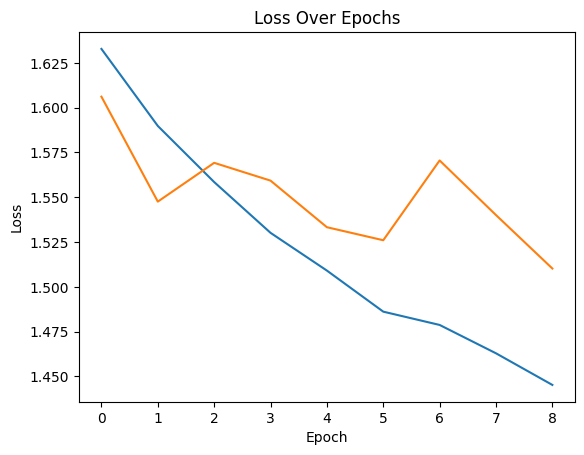

In [ ]:
#Calculate and plot the training and validation losses of the tuned network.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

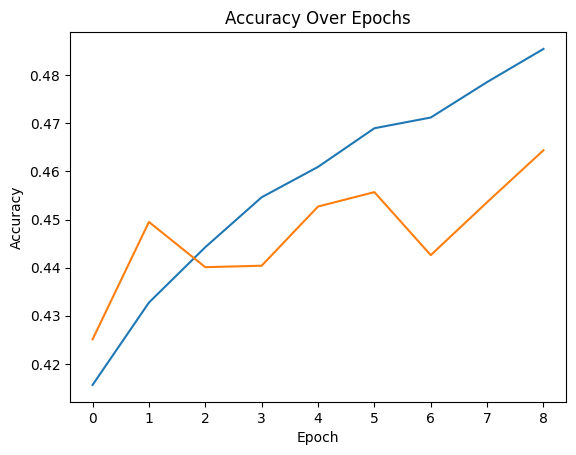

In [ ]:
#Calculate and plot the training and validation accuracies of the tuned network.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

I did not have time to run for longer but looks like it would have kept improving